In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# 1) Replace the NaN values with correct value

In [6]:
dataset["salary"].fillna(0,inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_2968\2579307379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# 2. how many of them not placed

In [8]:
#Count the 'Not Placed' in the 'status' column
not_placed_count = dataset[dataset['status'] == 'Not Placed']['status'].count()
print(f'Number of Not Placed students: {not_placed_count}')

Number of Not Placed students: 67


# how to find out the relationship between Salary and mba_p?

In [9]:
#Calculate Pearson correlation between 'mba_p' and 'salary'
correlation = dataset[['mba_p', 'salary']].corr()
print("Correlation between mba_p and salary:")
print(correlation)


Correlation between mba_p and salary:
           mba_p    salary
mba_p   1.000000  0.139823
salary  0.139823  1.000000


# Which specialization is getting minimum salary?

In [10]:
#group the data by 'specialisation' and find the minimum salary for each group
min_salary_specialization = dataset.groupby('specialisation')['salary'].min()
#Display the specialization with the minimum salary
min_specialization = min_salary_specialization.idxmin()
min_salary = min_salary_specialization.min()
print(f"The specialization with the minimum salary is {min_specialization} with a salary of {min_salary}")


The specialization with the minimum salary is Mkt&Fin with a salary of 0.0


# How many of them getting above 500000 salary?

In [11]:
#Filter the dataset where salary is greater than 500000
students_above_500k = dataset[dataset['salary'] > 500000]
#Count the number of students with salary above 500000
num_students_above_500k = students_above_500k.shape[0]
print(f"Number of students getting a salary above 500,000: {num_students_above_500k}")


Number of students getting a salary above 500,000: 3


# Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [12]:
#The Hypothesis Testing for ANOVA follows these steps:
#State the Hypotheses
#- Null Hypothesis (H₀): There is no significant difference between the means of etest_p and mba_p.
#- Alternative Hypothesis (H₁): There is a significant difference between the means of etest_p and mba_p
#- If the p-value is less than 0.05, reject the null hypothesis.
#- accept Alternative Hypothesis



In [13]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [14]:
# hypothesis testing
# Null Hypothesis (H₀): There is no significant difference between the means of etest_p and mba_p.
# Alternative Hypothesis (H₁): There is a significant difference between the means of etest_p and mba_p.


# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


In [ ]:
# independant sample-unPaired T_Test
# different group(degree_t(sci & Tech),specialisation(MKt&HR)) but same condition(salary)

In [15]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
sci_tech_salary = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
mkt_hr_salary = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']
ttest_ind(sci_tech_salary, mkt_hr_salary,)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))

In [16]:
#hypothesis testing:
#p-value is 0.007 (p<0.05) so reject null hyphothesis & accept the Alternate hyphothesis
#soluction:
##NULL hypothesis(H0) = there is a siginificant difference between these columns
#Alternate hypothesis(H1) = there is no significant difference between these columns




# 9)Convert the normal distribution to standard normal distribution for salary column

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def stdNBGgraph(dataset):
    # Calculate mean and standard deviation of the dataset
    mean = dataset.mean()
    std = dataset.std()
    # Calculate Z-scores
    z_score = [(i - mean) / std for i in dataset]
    # Plot the distribution of the Z-scores
    sns.histplot(z_score, kde=True, color='blue')
    plt.title("Standard Normal Distribution (Z-scores)")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.show()

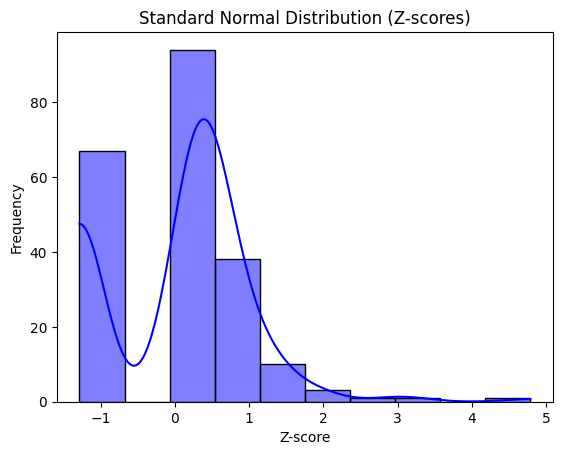

In [18]:
stdNBGgraph(dataset["salary"])

# 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [19]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample=dataset
    # calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probability for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value)for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob


C:\Users\user\AppData\Local\Temp\ipykernel_2968\253709592.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')


Mean=198702.326,Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

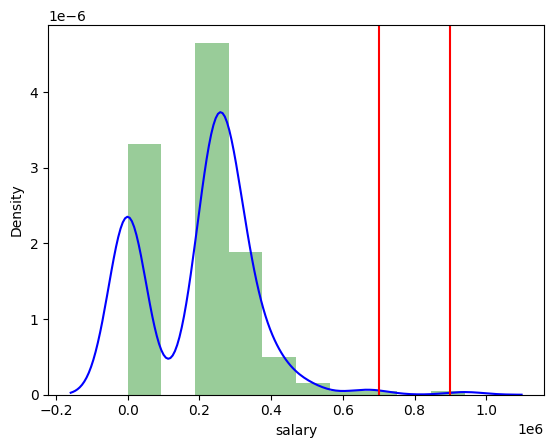

In [20]:
get_pdf_probability(dataset["salary"],700000,900000)

# 11)Test the similarity between the degree_t(Sci&Techwith respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)


In [21]:
# degree_t(sci & Tech)------>calculate etest_p, & mba_p
# dependant sample-Paired T_Test
# same group(degree_t(sci & Tech)) but Different condition(etest_p, & mba_p)

In [22]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
degree=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree,degree1)

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.517920600505392e-06), df=np.int64(58))

In [23]:
#hypothesis testing:
# here p-value is 5.5179  (p>0.05) so Accept null hyphothesis & reject the Alternate hyphothesis
#soluction:
##NULL hypothesis(H0) = there is no siginificant difference between these columns
#Alternate hypothesis(H1) = there is a significant difference between these columns



# 12)Which parameter is highly correlated with salary?

In [24]:
quan=[]
qual=[]
for columnname in dataset.columns:
    print(columnname)
    if(dataset[columnname].dtype=='O'):
        print("qual")
        qual.append(columnname)
    else:
        print("quan")
        quan.append(columnname)
            

sl_no
quan
gender
qual
ssc_p
quan
ssc_b
qual
hsc_p
quan
hsc_b
qual
hsc_s
qual
degree_p
quan
degree_t
qual
workex
qual
etest_p
quan
specialisation
qual
mba_p
quan
status
qual
salary
quan


In [25]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [26]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [27]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [28]:
# Soluction:
#Based on the correlation matrix you provided, the parameter most highly correlated with salary is:
#- ssc_p (Secondary School Percentage) with a correlation value of 0.538090.
#Interpretation:
#- ssc_p has the highest positive correlation with salary among all the parameters in your dataset, meaning that secondary school percentage is the most important factor affecting salary in this dataset.
#Summary:
#The parameter ssc_p (Secondary School Percentage) is the most highly correlated with salary, with a moderate positive correlation of 0.538090.

# 14) plot any useful graph and explain it.



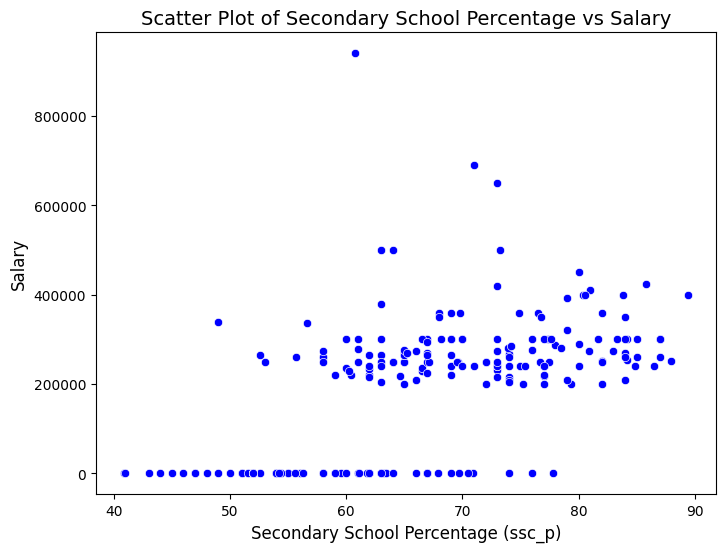

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#Scatter plot to visualize relationship between 'ssc_p' and 'salary'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['ssc_p'], y=dataset['salary'], color='blue')
#Adding title and labels
plt.title('Scatter Plot of Secondary School Percentage vs Salary', fontsize=14)
plt.xlabel('Secondary School Percentage (ssc_p)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
#Show plot
plt.show()